In [9]:
import os
import pandas as pd
import pdb
import time

cnt = 0
#score = 0.0

path = '/home/kai/data/kaggle/toxic/sc/stacking/StackPreds/TopN_XGB/'

xgb_topn_repo = {}      
#select_to_essemble = [] # this will affect the scatter plotting later
select_to_essemble = ['xgb_topn_1519899793.csv', 'scaled_xgb_topn__1519899793_0.99172342.csv',
                     '_xgb_topn__0.991732_1519970088.csv','_xgb_topn__0.99157372_1519997805.csv',
                     '_xgb_topn__0.99152478_1519994141.csv']

for filename in os.listdir(path):
    #pdb.set_trace()
    #score += float(item.split('_')[-1])
    select = None
    if len(select_to_essemble) == 0: # if selecting any specific ones to essemble, then essemble all 
        select = filename
    else:
        if filename in select_to_essemble:
            select = filename
        else:
            continue
    print('selected: ' + select)
    tmp = pd.read_csv(path+select)
    xgb_topn_repo[select] = tmp
    if cnt == 0:
        preds = tmp
        label_cols = list(preds.columns)
        label_cols.pop(0) # remove 'id'
    else:
        preds[label_cols] += tmp[label_cols]
    cnt += 1

print(str(cnt)+' results selected')
preds[label_cols] = preds[label_cols].applymap(lambda x: x/cnt)

selected: _xgb_topn__0.99152478_1519994141.csv
selected: _xgb_topn__0.99157372_1519997805.csv
selected: xgb_topn_1519899793.csv
selected: _xgb_topn__0.991732_1519970088.csv
selected: scaled_xgb_topn__1519899793_0.99172342.csv
5 results selected


In [10]:
label_cols

['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

In [11]:
preds.head(3)

,id,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,00001cee341fdb12,0.999204,0.463587,0.986208,0.232257,0.958820,0.534406
1,0000247867823ef7,0.000260,0.002717,0.001127,0.000575,0.001312,0.001269
2,00013b17ad220c46,0.003762,0.002763,0.001314,0.001069,0.001462,0.001446


essemble_name = 'xgb_ensemble'
preds.to_csv(path+essemble_name+'_{}_{}.csv.gz'.format(cnt, int(time.time())), index=False, compression='gzip')

In [12]:
list(xgb_topn_repo)

['_xgb_topn__0.99152478_1519994141.csv',
 '_xgb_topn__0.99157372_1519997805.csv',
 'xgb_topn_1519899793.csv',
 '_xgb_topn__0.991732_1519970088.csv',
 'scaled_xgb_topn__1519899793_0.99172342.csv']

In [13]:
label_cols

['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

In [14]:
from toxic_utils import scatter_per_label
%matplotlib inline

toxic
severe_toxic
obscene
threat
insult
identity_hate
['_xgb_topn__0.99152478_1519994141.csv', '_xgb_topn__0.99157372_1519997805.csv', 'xgb_topn_1519899793.csv', '_xgb_topn__0.991732_1519970088.csv', 'scaled_xgb_topn__1519899793_0.99172342.csv']


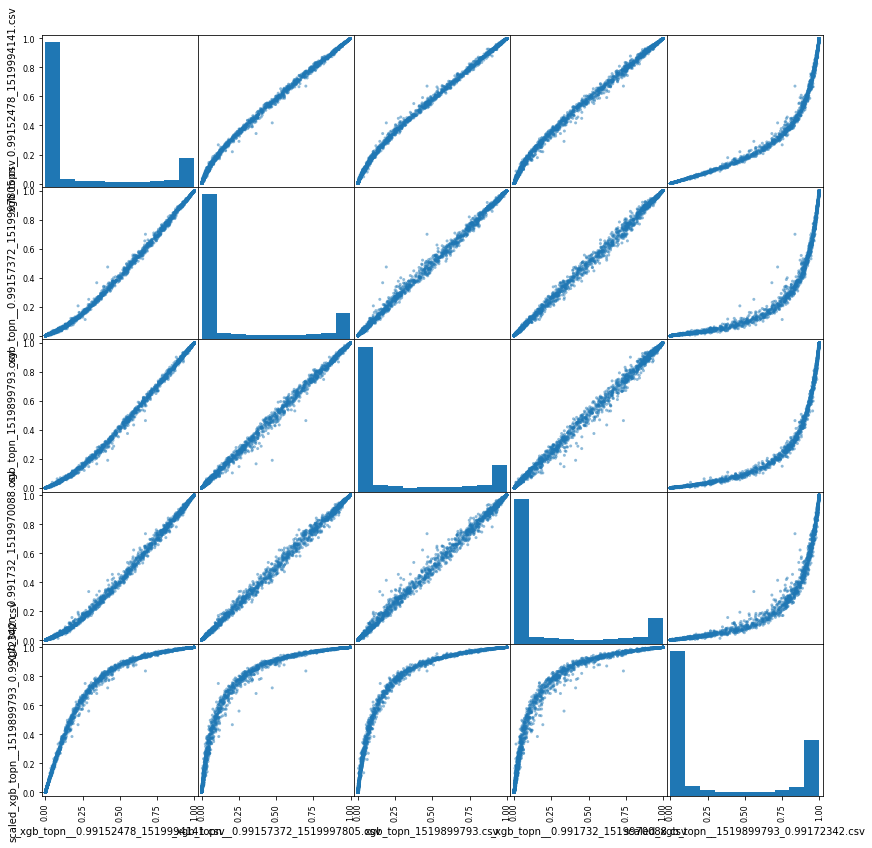

In [15]:
scatter_per_label(xgb_topn_repo, 'toxic', 5000)